# Inicialización

In [1]:
# funciones
import matplotlib.pyplot as plt
import numpy as np
from fun_gilles import *

def concentration_time(times, abundances, V, species):
    colors = plt.cm.rainbow(np.linspace(0, 1, len(species)))
    plt.figure()
    plt.grid(True, linestyle='--', alpha=0.3)
    for i in range(len(species)):
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.show()

def volume_time(times, V):
    plt.figure()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.plot(times, V, color= plt.cm.rainbow(0))
    plt.xlabel("Time")
    plt.ylabel("Volume")
    plt.show()

def abundances_times(times, abundances, species):
    plt.figure()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(species)))
    
    for i in range(len(species)):
        plt.plot(times, abundances[:, i], label=species[i], color=colors[i], alpha=0.9)
    
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("Time")
    plt.ylabel("Abundances")
    plt.legend()
    plt.title(f"Time evolution: {np.shape(times)[0]-1} iterations, k= {k}")
    plt.show()
    
def plot(abundances, times, V):
    colors = plt.cm.rainbow(np.linspace(0, 1, len(species)))

    # --- Create the figure and a 1-row, 3-column subplot grid ---
    # Using a wide figsize for a horizontal layout.
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=False) 
    # Note: sharex=True is removed because we need the x-axis ticks on all three plots, 
    # although they are the same (time).

    # --- Subplot 1 (Left): Concentration ---
    ax1 = axes[0]
    for i in range(len(species)):
        # Calculate Concentration = Abundance / Volume
        ax1.plot(times, abundances[:, i] / V, label=species[i], color=colors[i], alpha=0.9)
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Concentration")
    ax1.set_title("Concentration Evolution")

    # --- Subplot 2 (Middle): Volume ---
    ax2 = axes[1]
    ax2.plot(times, V, color='gray')
    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Volume")
    ax2.set_title("Volume Evolution")


    # --- Subplot 3 (Right): Abundances and Legend ---
    ax3 = axes[2]
    for i in range(len(species)):
        ax3.plot(times, abundances[:, i], label=species[i], color=colors[i], alpha=0.9)
    ax3.grid(True, linestyle='--', alpha=0.3)
    ax3.set_xlabel("Time")
    ax3.set_ylabel("Abundances")
    ax3.set_title("Abundance Evolution")
    # Place the legend here, slightly outside the plot area for all species
    ax3.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Species")


    # --- Final Touches ---
    # Add a figure-wide title
    fig.suptitle(f"Simulation Results (k= {k})", fontsize=16)

    # Adjust layout to prevent labels/titles from overlapping
    plt.tight_layout(rect=[0, 0, 1, 1]) # Adjust tight_layout for a single row

    plt.show()

# Pruebas con el sistema XYC

## Ejemplo 1

In [ ]:
# Initialization:
file = "reactions_XYC_food.txt" # M reactions
# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)

method = "Gillespie" # Gillespie or Deterministic

# Reaction constants:
k = [1,0,1,1]+[0.1]*2 # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [200,0,0,0,0] # initial molecules number


n_iterations= 200000 # In the deterministic mode n_iterations refers to the t_end


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)



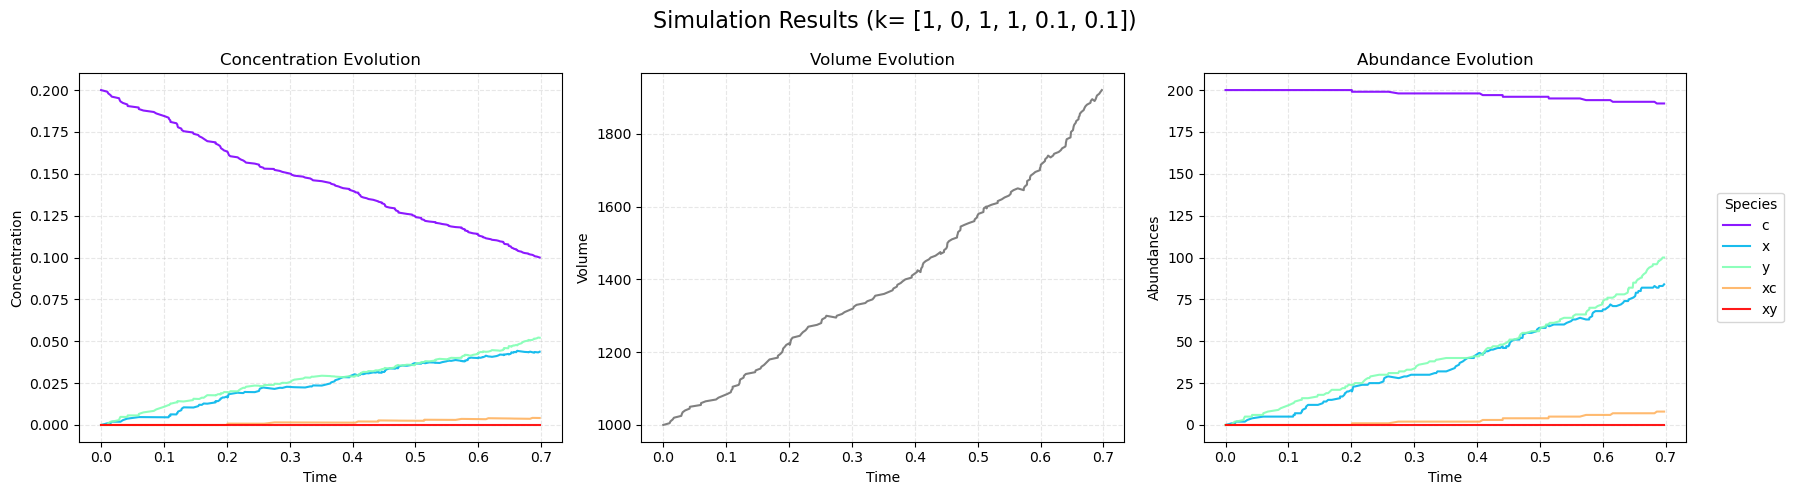

In [3]:
plot(abundances, times, V)

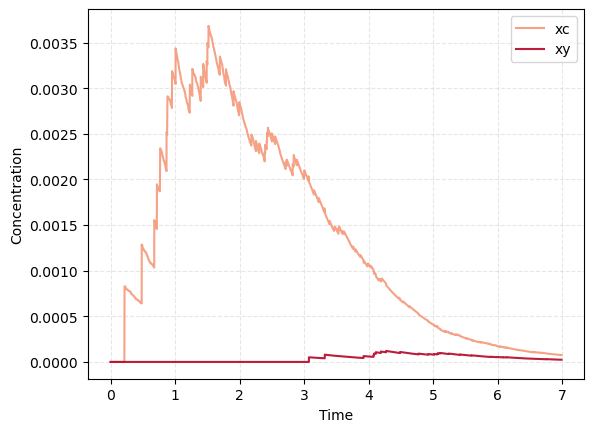

In [26]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
plt.figure()
plt.grid(True, linestyle='--', alpha=0.3)
for i in range(len(species)):
    if species[i] == 'xc' or species[i] == 'xy':
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.show()

### marina

In [39]:
method = "Protocell" # Gillespie or Deterministic

# Reaction constants:
k = [1,0,1,1] # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [500,1000,1000,0,0] # initial molecules number


n_iterations= 50000 # In the deterministic mode n_iterations refers to the t_end


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

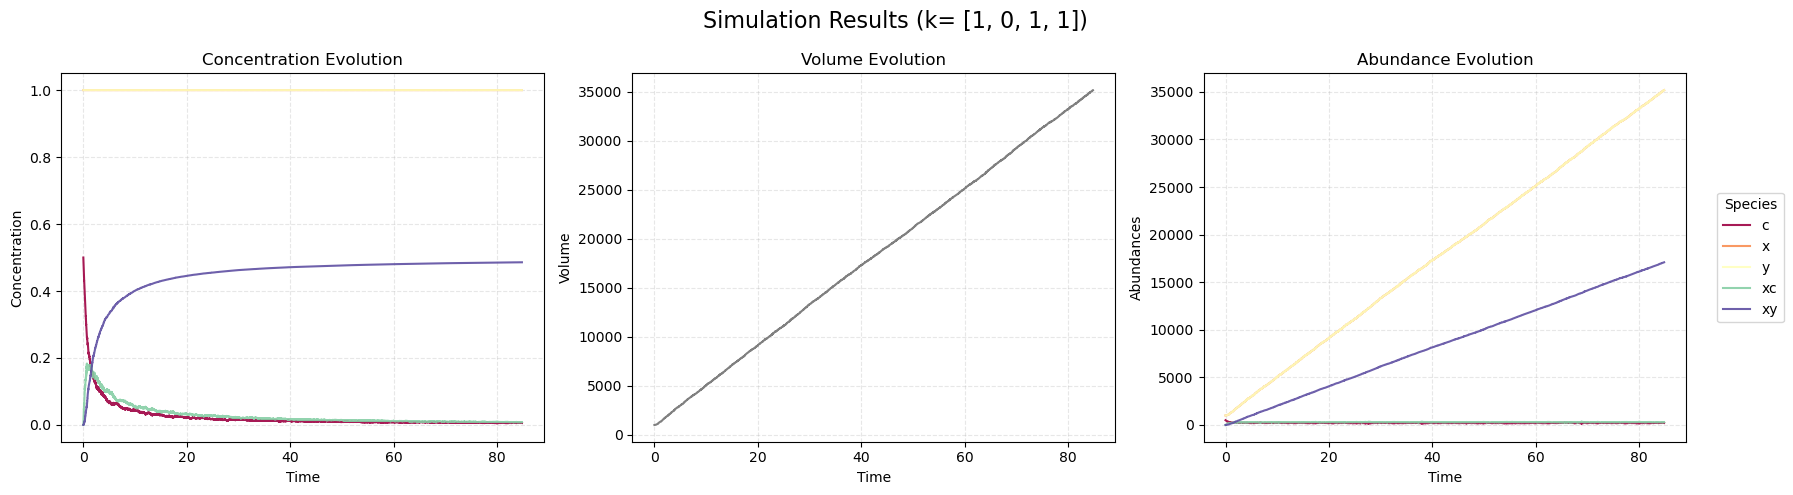

In [40]:
plot(abundances, times, V)

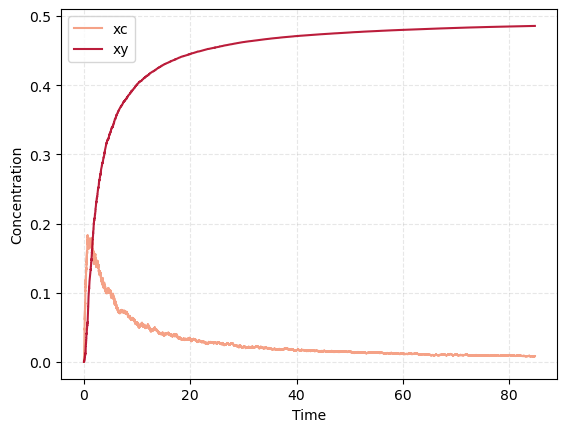

In [41]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
plt.figure()
plt.grid(True, linestyle='--', alpha=0.3)
for i in range(len(species)):
    if species[i] == 'xc' or species[i] == 'xy':
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.show()

## Ejemplo 2

In [45]:
# Initialization:
file = "reactions_XYC_food.txt" # M reactions
method = "Gillespie" # Gillespie or Deterministic

# Reaction constants:
k = [1,0,1,0]+ [1e-2]*2 # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [100,0,0,0,0] # initial molecules number

# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)
n_iterations= 100000 # In the deterministic mode n_iterations refers to the t_end


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

KeyboardInterrupt: 

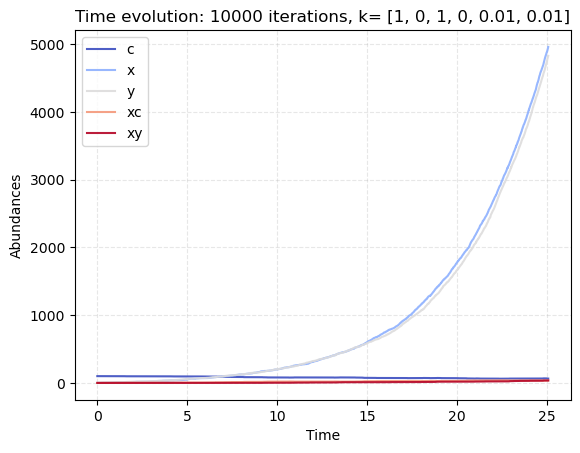

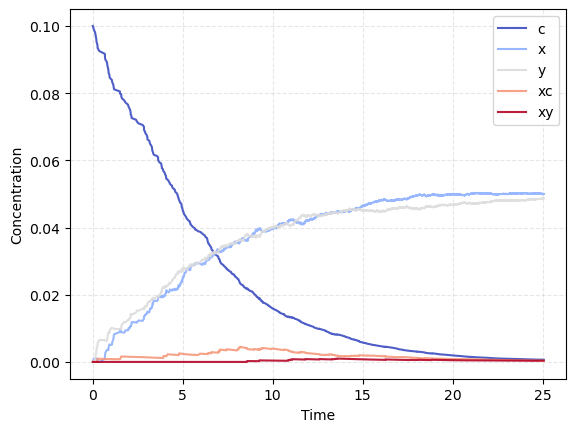

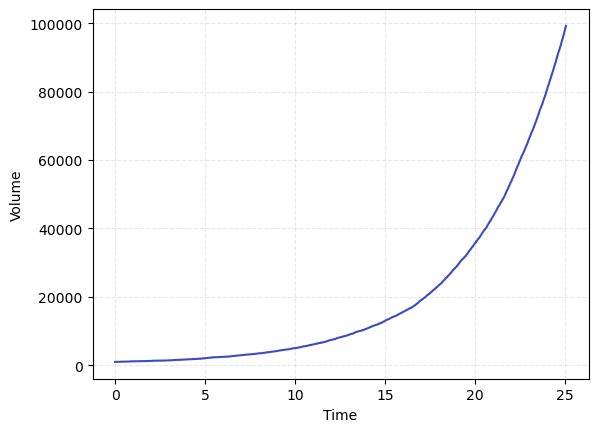

In [ ]:
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

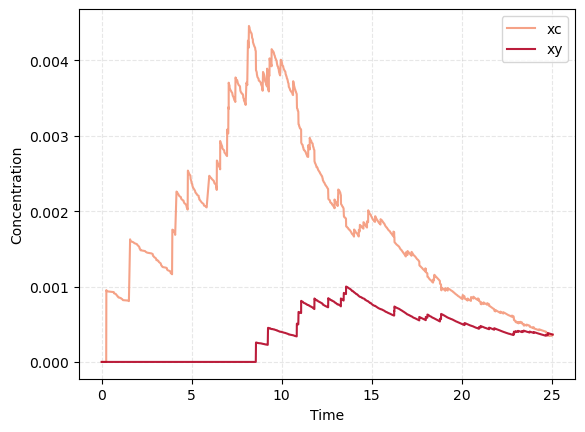

In [ ]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
plt.figure()
plt.grid(True, linestyle='--', alpha=0.3)
for i in range(len(species)):
    if species[i] == 'xc' or species[i] == 'xy':
    # if species[i] == 'y':
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.show()

## Ejemplo 3: --> X + Y

In [26]:
# Initialization:
file = "reactions_XYC_food_XY.txt" # M reactions
method = "Gillespie" # Gillespie or Deterministic

# Reaction constants:
k = [1,0,1,0]+ [1e-2] # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [100,0,0,0,0] # initial molecules number

# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)
n_iterations= 10000 # In the deterministic mode n_iterations refers to the t_end


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

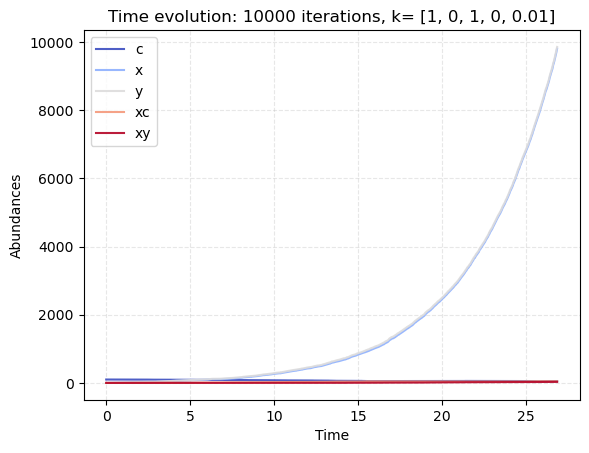

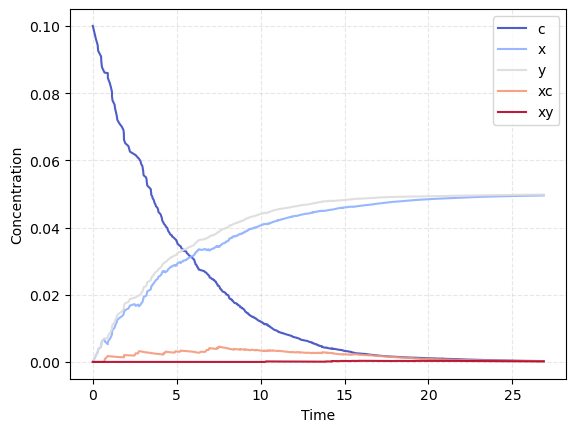

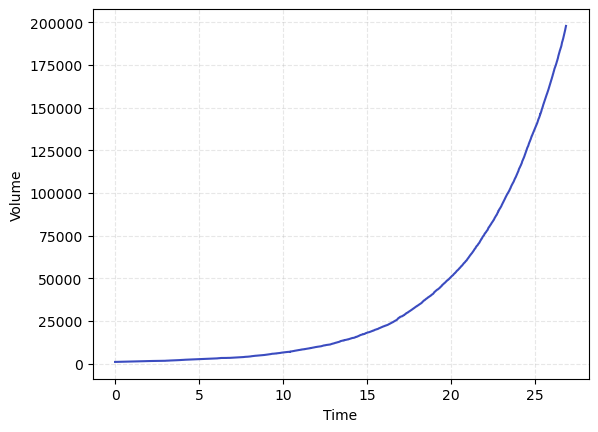

In [27]:
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

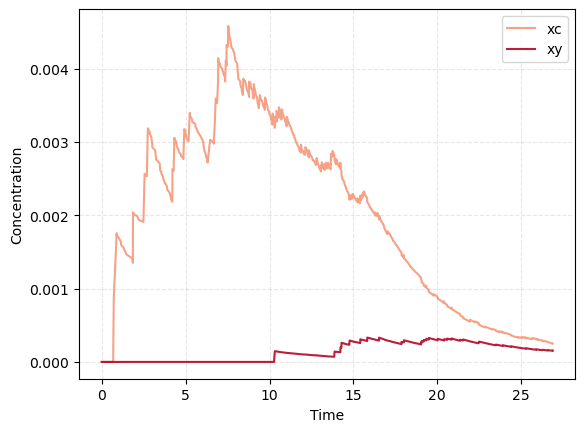

In [28]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
plt.figure()
plt.grid(True, linestyle='--', alpha=0.3)
for i in range(len(species)):
    if species[i] == 'xc' or species[i] == 'xy':
    # if species[i] == 'x':
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.show()

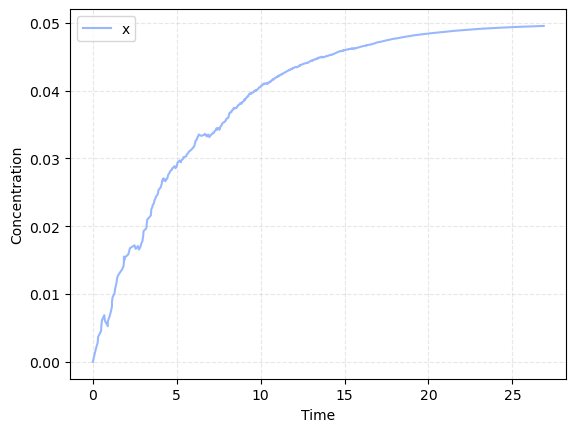

In [29]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
plt.figure()
plt.grid(True, linestyle='--', alpha=0.3)
for i in range(len(species)):
    # if species[i] == 'xc' or species[i] == 'xy':
    if species[i] == 'x':
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.show()

### 3.1 con X e Y iniciales

In [30]:
# Initialization:
file = "reactions_XYC_food.txt" # M reactions
method = "Gillespie" # Gillespie or Deterministic

# Reaction constants:
k = [1,0,1,0]+ [1e-2]*2 # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [1000,100,100,0,0] # initial molecules number

# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)
n_iterations= 100000 # In the deterministic mode n_iterations refers to the t_end


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

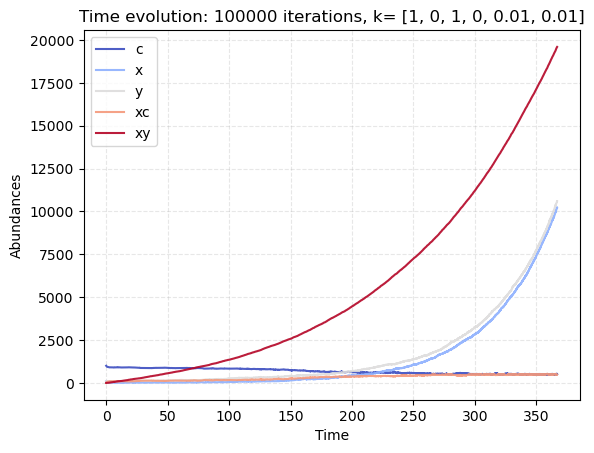

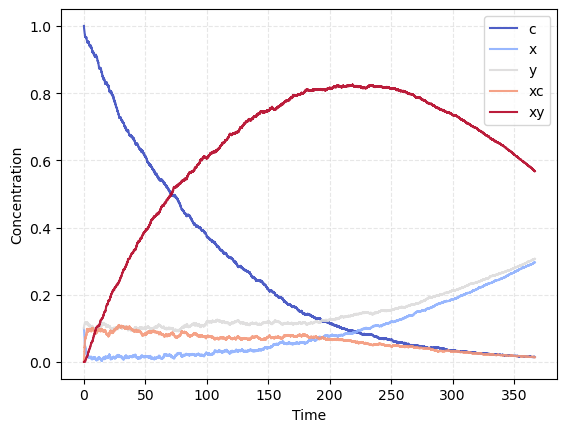

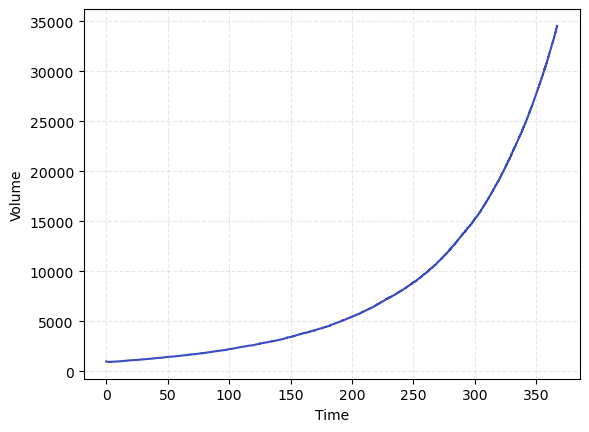

In [31]:
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

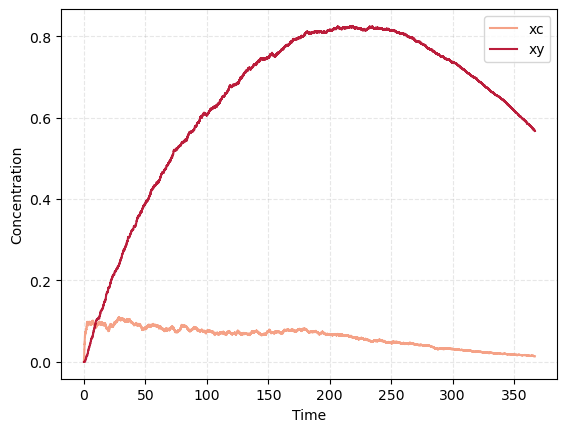

In [32]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
plt.figure()
plt.grid(True, linestyle='--', alpha=0.3)
for i in range(len(species)):
    if species[i] == 'xc' or species[i] == 'xy':
    # if species[i] == 'x':
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.show()

## Ejemplo 4: solo XC + Y <-> XY + C reversible

In [33]:
# Reaction constants:
k = [1,0,1,1]+ [1e-2]*2 # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [500,100,100,0,0] # initial molecules number
n_iterations= 100 # In the deterministic mode n_iterations refers to the t_end


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

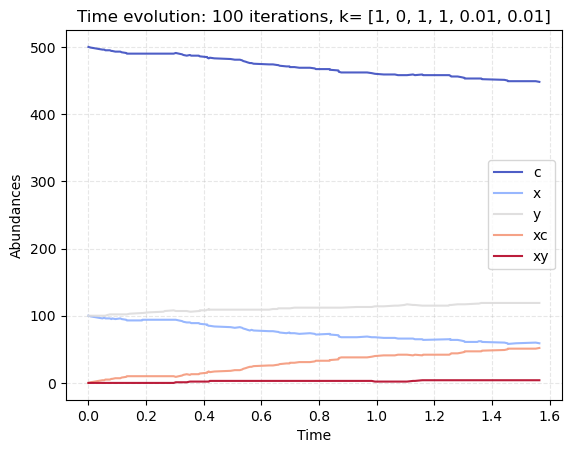

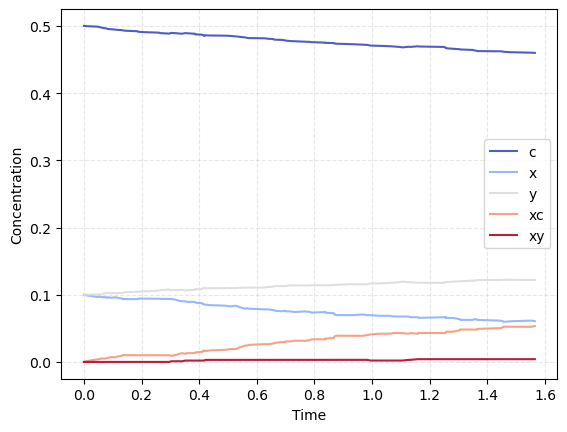

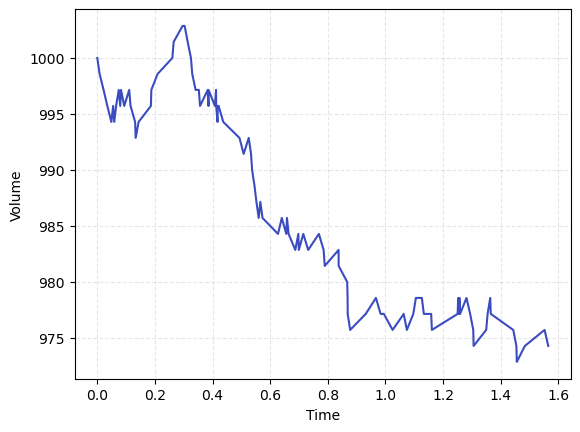

In [34]:
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

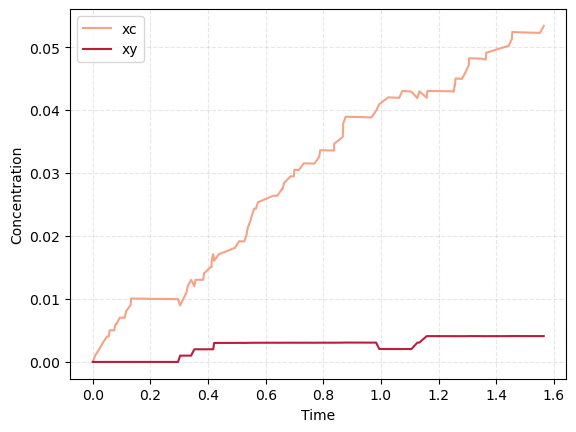

In [35]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
plt.figure()
plt.grid(True, linestyle='--', alpha=0.3)
for i in range(len(species)):
    if species[i] == 'xc' or species[i] == 'xy':
    # if species[i] == 'y':
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.show()

## Ejemplo 5: solo X + C <-> XC reversible

In [36]:
# Reaction constants:
k = [1,1,1,0]+ [1e-2]*2 # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [500,100,100,0,0] # initial molecules number
n_iterations= 100 # In the deterministic mode n_iterations refers to the t_end


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

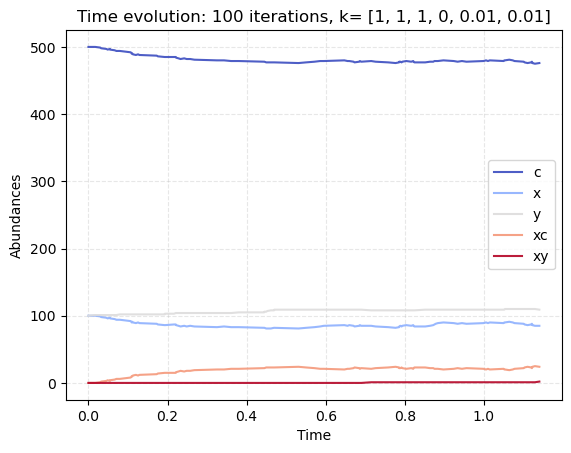

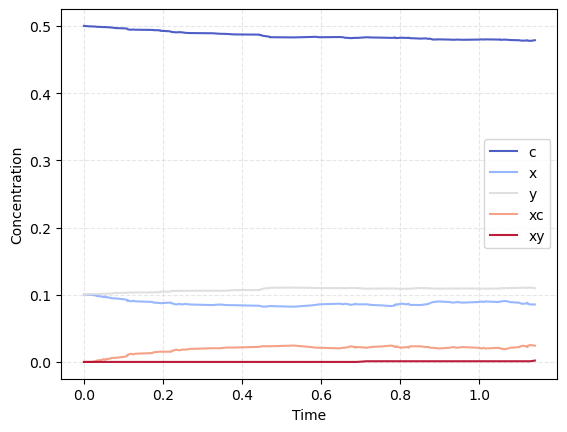

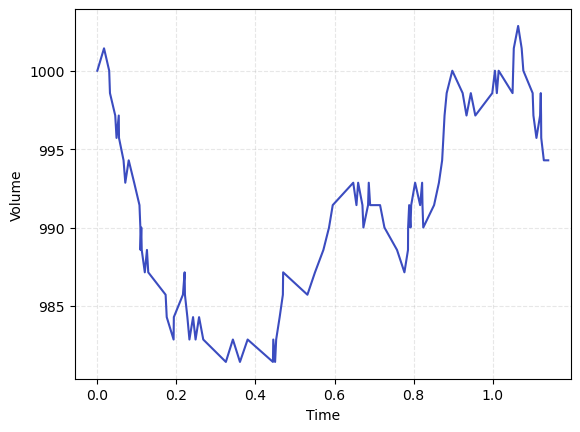

In [37]:
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

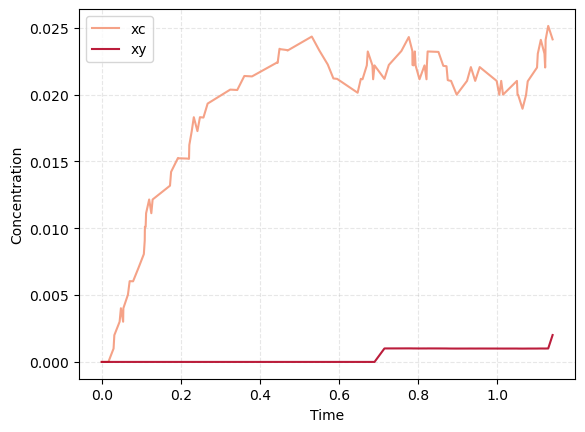

In [38]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
plt.figure()
plt.grid(True, linestyle='--', alpha=0.3)
for i in range(len(species)):
    if species[i] == 'xc' or species[i] == 'xy':
    # if species[i] == 'x':
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.show()

## Ejemplo 6: todo reversible

In [15]:
# Initialization:
file = "reactions_XYC_food.txt" # M reactions
# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)# Reaction constants:

k = [1,1,1,1]+ [1e-2]*2 # len(k)= # de reacciones
# Volume:
V = 10000

# condiciones iniciales
initial_food = [20000,10000,10000,0,0] # initial molecules number
n_iterations= 200000 # In the deterministic mode n_iterations refers to the t_end


abundances, times, V = chemistry("Gillespie", n_iterations, reactions,
                                initial_food, k, V)

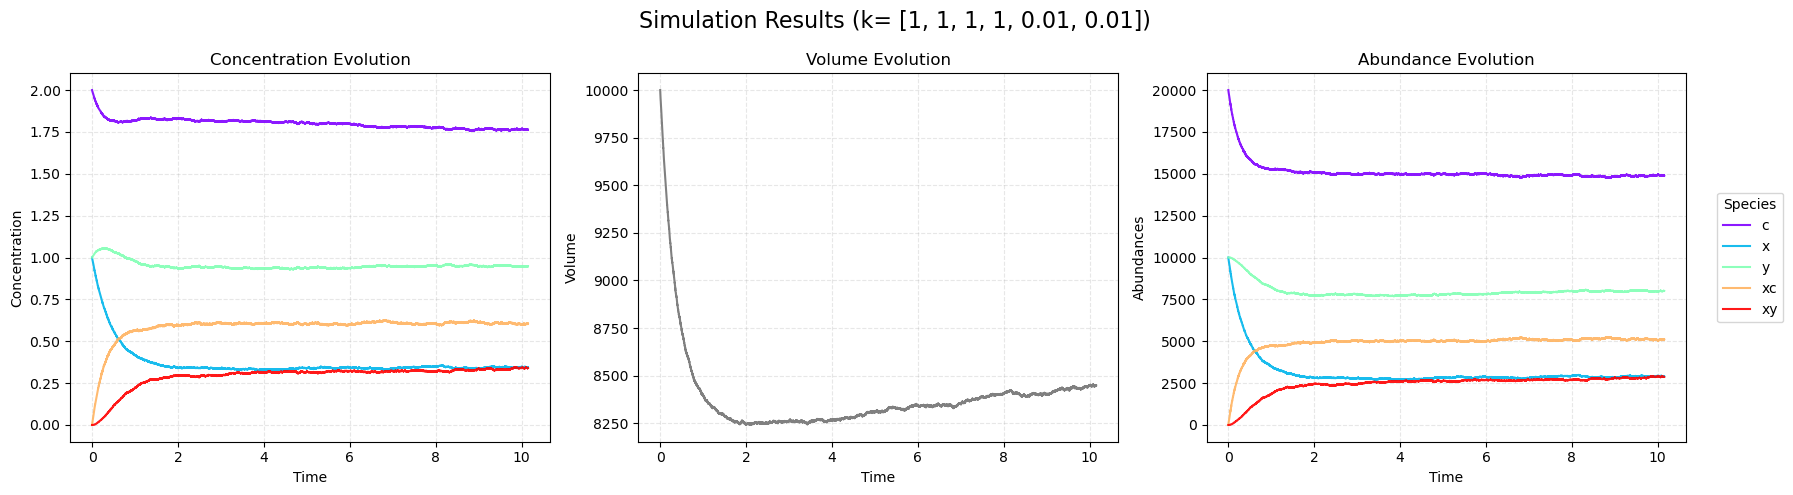

In [16]:
plot(abundances, times, V)

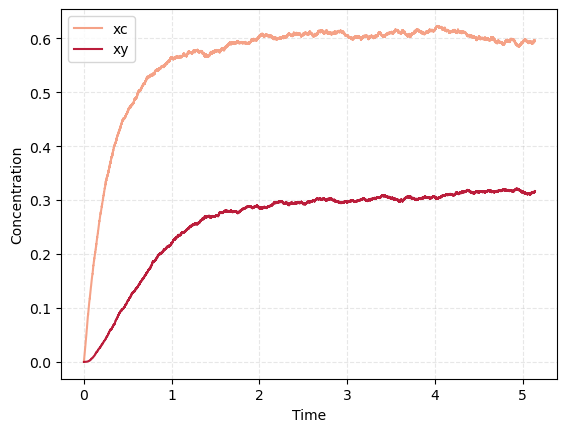

In [104]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
plt.figure()
plt.grid(True, linestyle='--', alpha=0.3)
for i in range(len(species)):
    if species[i] == 'xc' or species[i] == 'xy':
    # if species[i] == 'x':
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.show()

In [105]:
print(abundances[:-10])

[[2.0000e+04 1.0000e+04 1.0000e+04 0.0000e+00 0.0000e+00]
 [1.9999e+04 9.9990e+03 1.0000e+04 1.0000e+00 0.0000e+00]
 [1.9998e+04 9.9980e+03 1.0000e+04 2.0000e+00 0.0000e+00]
 ...
 [1.5054e+04 2.8260e+03 7.8040e+03 4.9460e+03 2.6350e+03]
 [1.5055e+04 2.8260e+03 7.8030e+03 4.9450e+03 2.6360e+03]
 [1.5054e+04 2.8260e+03 7.8040e+03 4.9460e+03 2.6350e+03]]


### marina

In [6]:
# Reaction constants:
k = [1,1,1,1] # len(k)= # de reacciones
# Volume:
V = 10000

# condiciones iniciales
initial_food = [20000, 2.8260e+03, 7.8040e+03,0,0] # initial molecules number
n_iterations= 100000 # In the deterministic mode n_iterations refers to the t_end


abundances, times, V = chemistry("Protocell", n_iterations, reactions,
                                initial_food, k, V)

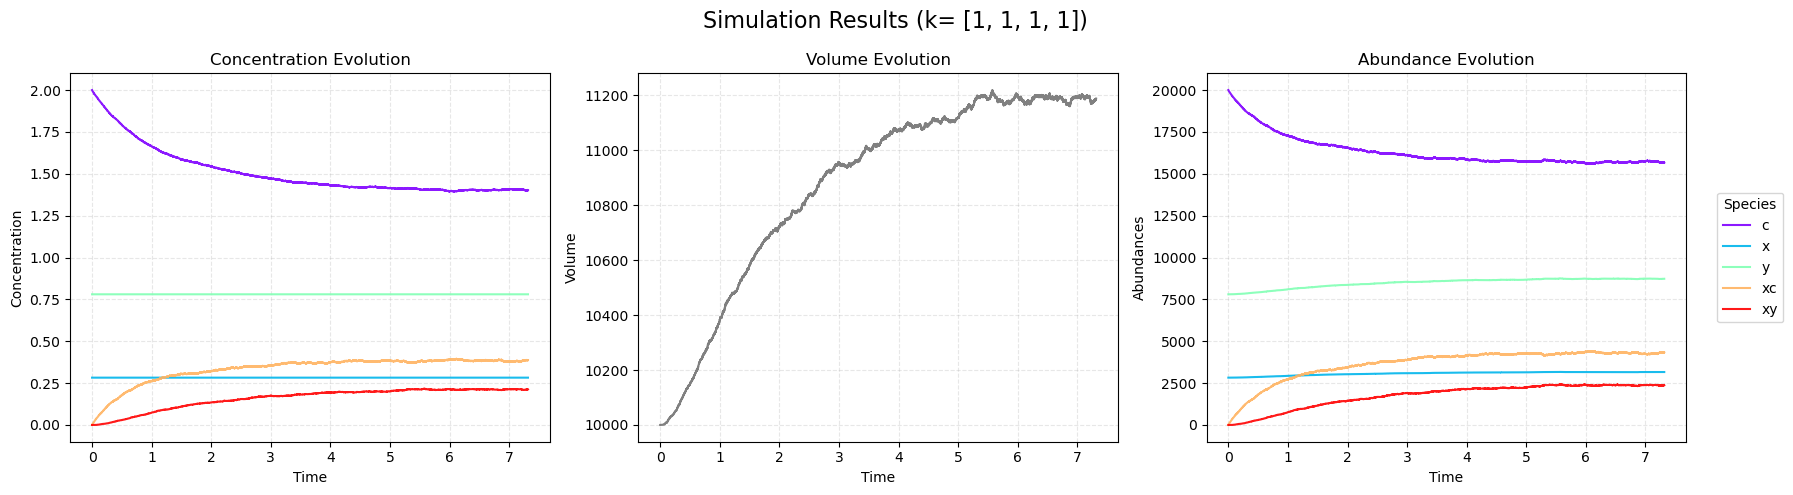

In [7]:
plot(abundances, times, V)

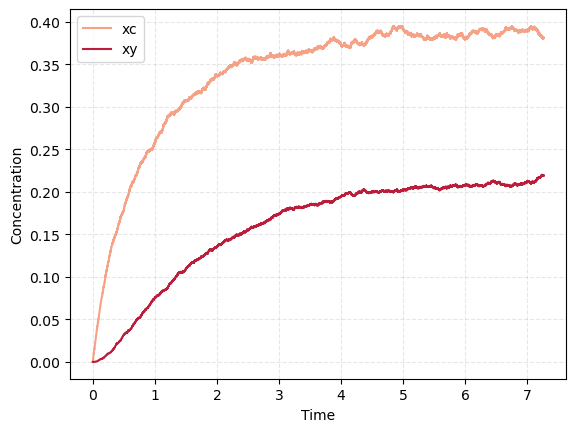

In [108]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
plt.figure()
plt.grid(True, linestyle='--', alpha=0.3)
for i in range(len(species)):
    if species[i] == 'xc' or species[i] == 'xy':
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.show()

# Pruebas con el sistema C

$\longrightarrow C_1$

$C_1 + C_2 \longleftrightarrow C_3$

$C_1 + C_3 \longleftrightarrow C_4$

$2C_2 \longleftrightarrow C_4$


## Ejemplo 1

In [8]:
# Initialization:
file = "reactions_C.txt" # M reactions
method = "Gillespie" # Gillespie or Deterministic

# Reaction constants:
k = [1e-2]+[1]*6 # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)
n_iterations= 100


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

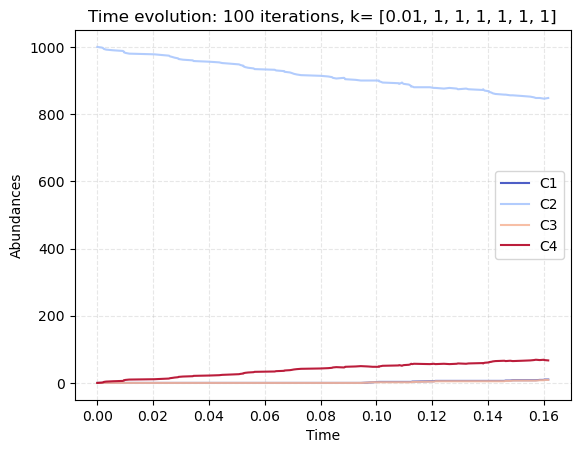

In [ ]:
abundances_times(times, abundances, species)

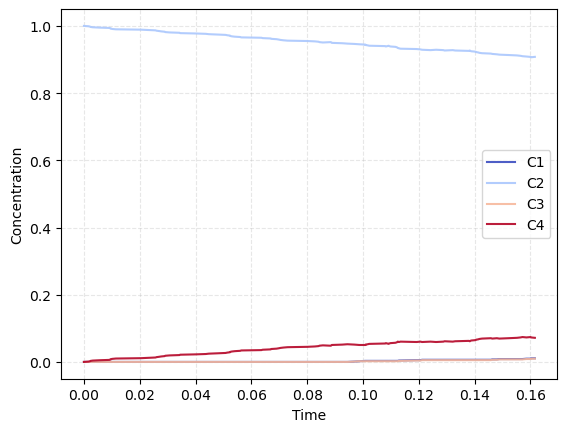

In [ ]:
concentration_time(times, abundances, V, species)

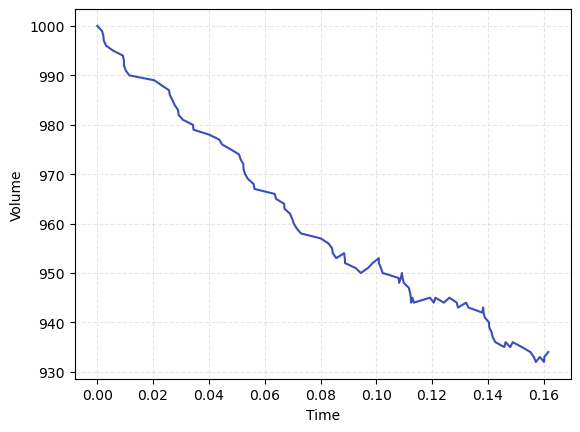

In [ ]:
volume_time(times, V)

### Zoom caida vol

In [ ]:
# Reaction constants:
k = [1e-2]+[1]*6 # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number
n_iterations= 1000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

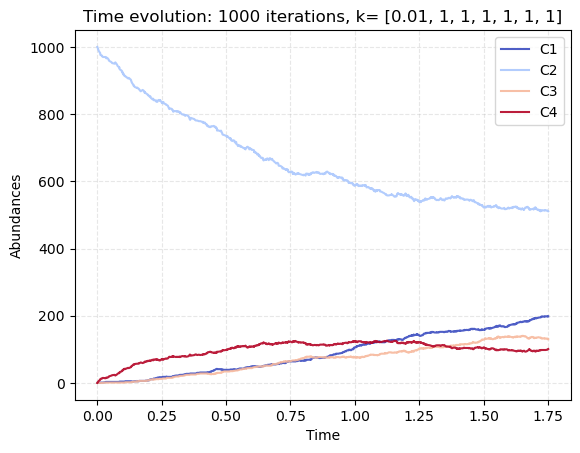

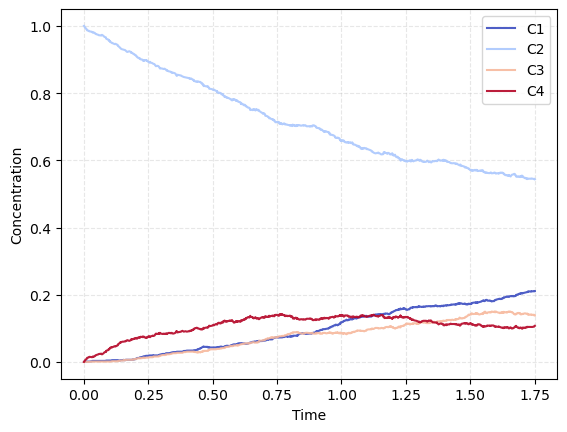

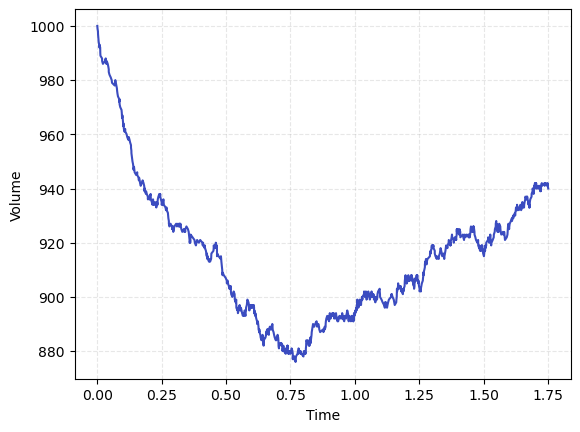

In [71]:
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

### Reacción 2 C2 --> C4 eliminada
Es raro que el volumen caiga al principio, pero supongo que es porque hay una caída de la abundancia total (el volumen se calcula para mantener la relacion abundancia/volumen constante). Esta caída se debe a la reacción c2+c2 --> c4. Para comprobarlo ponemos esa reacción a 0 y volvemos a representar el volumen, donde esperaríamos no tener esa caída

In [72]:
file = "reactions_C.txt" # M reactions
method = "Gillespie" # Gillespie or Deterministic

# Reaction constants:
k = [1e-2]+[1]*5 + [0] # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)
n_iterations= 50000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

KeyboardInterrupt: 

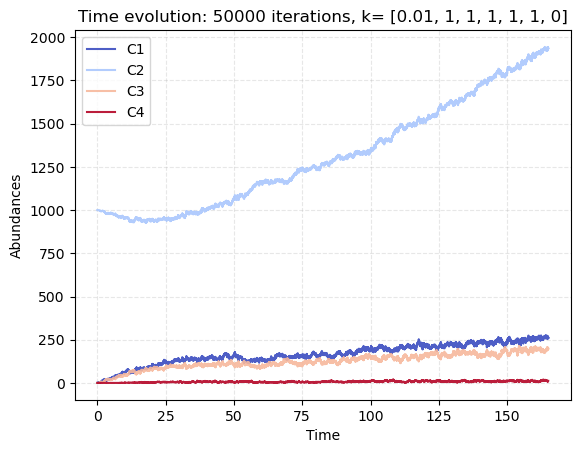

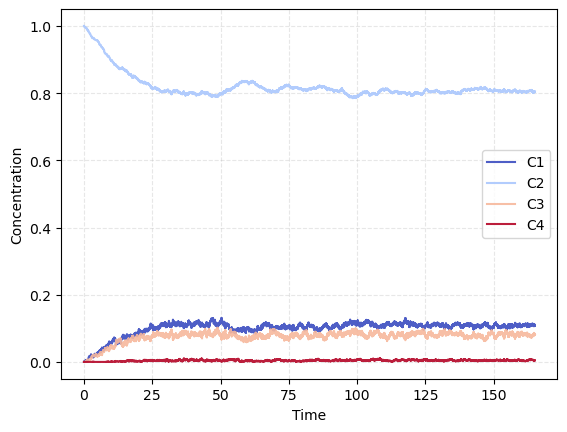

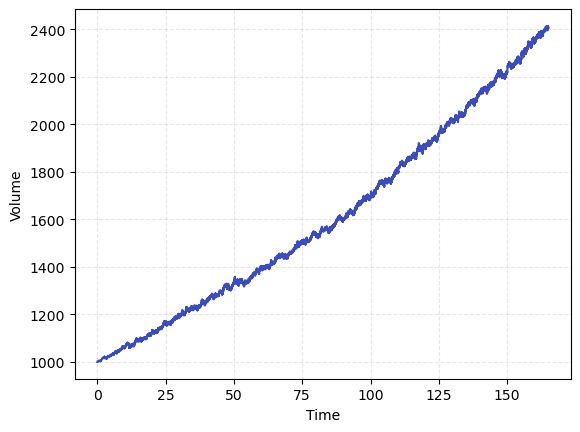

In [ ]:
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

## Ejemplo 2

Igual que el anterior, pero voy a poner a 0 todas las reacciones inversas menos la última

In [ ]:
# Reaction constants:
k = [1e-2]+[1,0,1,0,1,1]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

n_iterations= 100000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

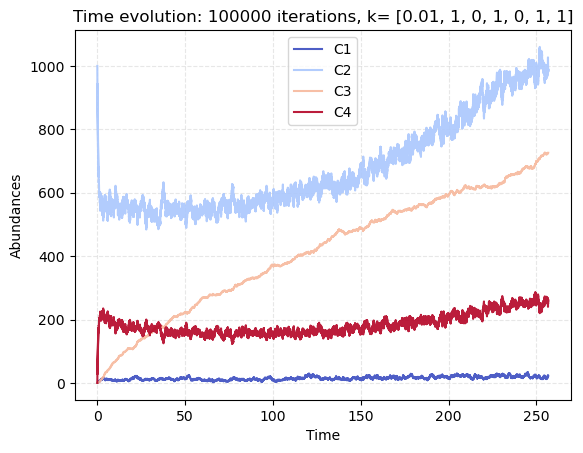

In [ ]:
abundances_times(times, abundances, species)

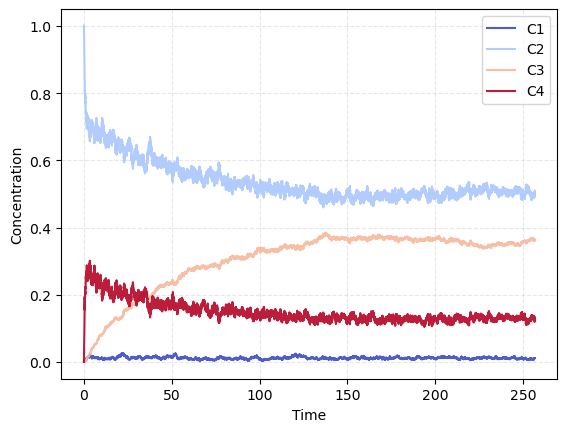

In [ ]:
concentration_time(times, abundances, V, species)

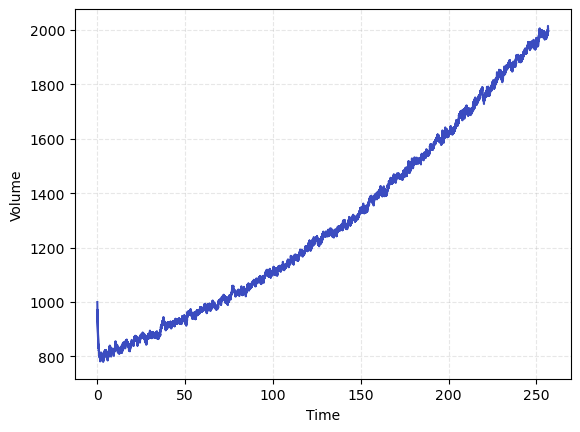

In [ ]:
volume_time(times, V)

## Ejemplo 3

Al poner una k de aparición de $C1$ muy baja, esperamos que el sistema tarde más en "empezar", por lo que el volumen caerá más al principio que en los casos anteriores

In [ ]:
method = "Gillespie"
# Reaction constants:
k = [1e-10]+[1]*6# len(k)= # de reacciones
# Volume:
V = 10000

# condiciones iniciales
initial_food = [0,10000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 200000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

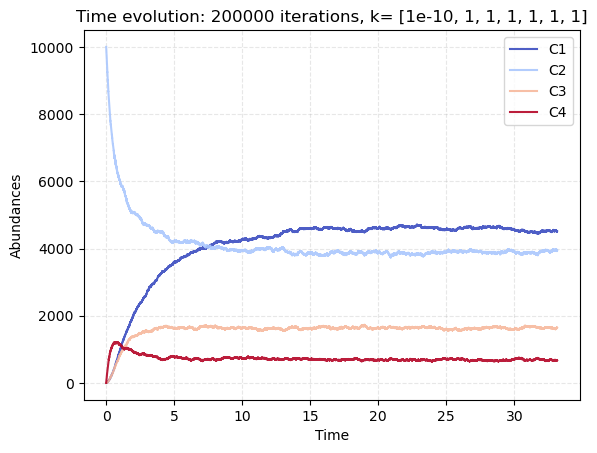

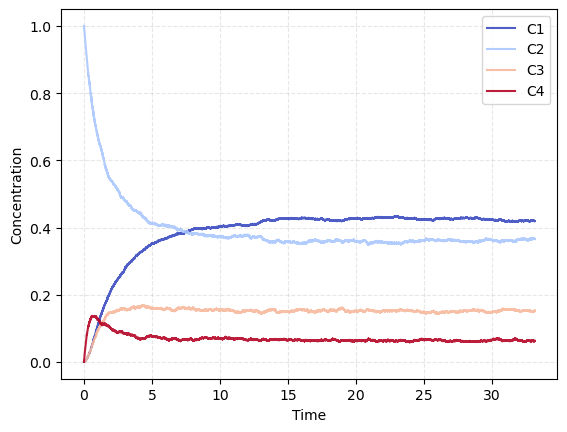

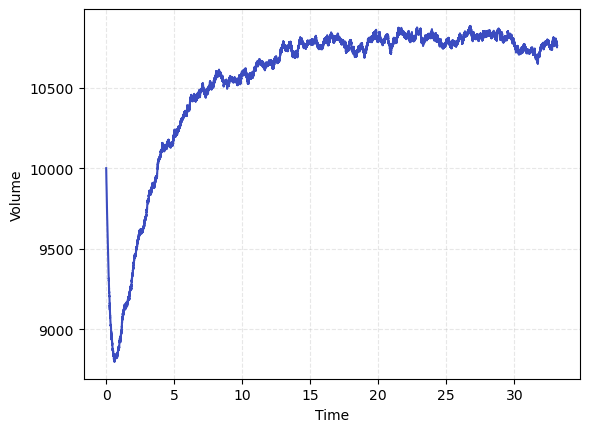

In [ ]:
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

### con protocélula

In [92]:
method = "Protocell"
# Reaction constants:
k = [1]*6# len(k)= # de reacciones
# Volume:
V = 10000

# condiciones iniciales
initial_food = [4000,10000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 1000000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

La probabilidad total es 0 !!


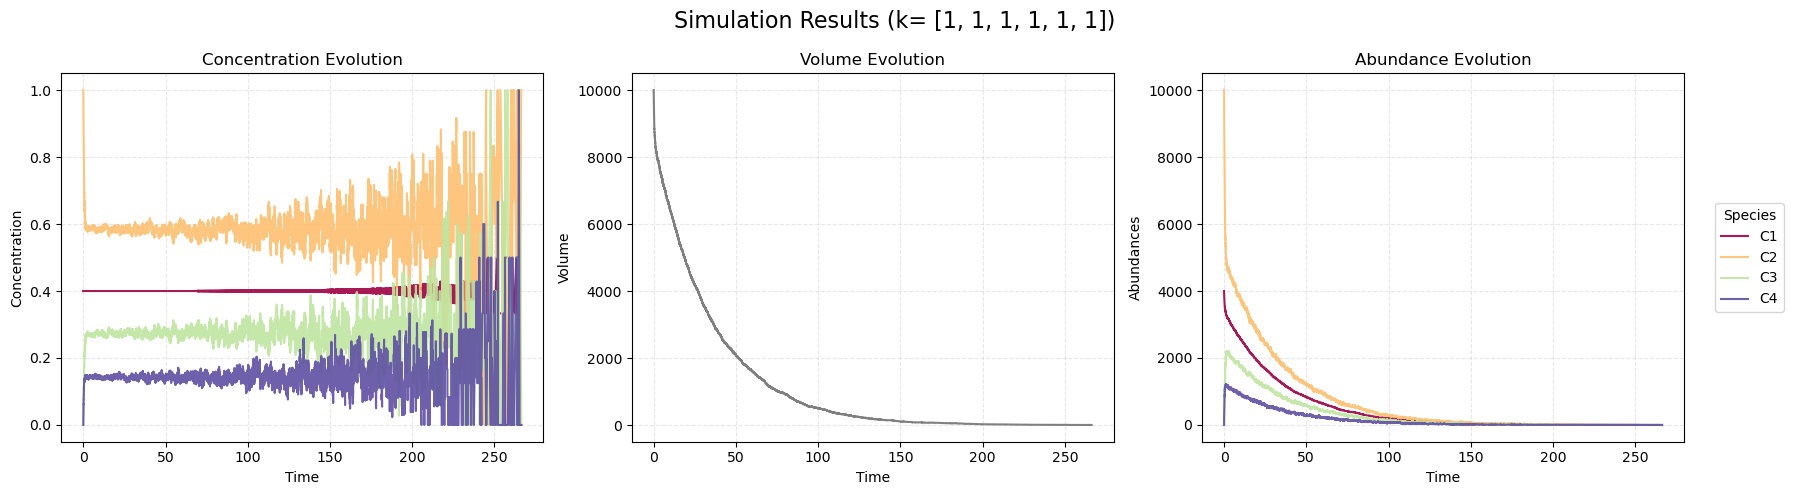

In [93]:
plot(abundances, times, V)

In [98]:
print(abundances[-20:])
print(V[-20:])
print(abundances[-20:,0]/V[-20:])

[[1. 0. 2. 0.]
 [1. 1. 1. 0.]
 [1. 0. 2. 0.]
 [1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [1. 2. 0. 0.]
 [1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [1. 3. 0. 0.]
 [1. 2. 1. 0.]
 [1. 3. 0. 0.]
 [1. 1. 0. 1.]
 [1. 3. 0. 0.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]
 [1. 2. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 2. 3. 2. 2. 2. 1. 1. 1.]
[0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.33333333 0.33333333 0.33333333
 0.5        0.33333333 0.5        0.5        0.5        0.
 0.         0.        ]


## Ejemplo 4

Voy a probar a poner una k de entrada de C1 muy alta

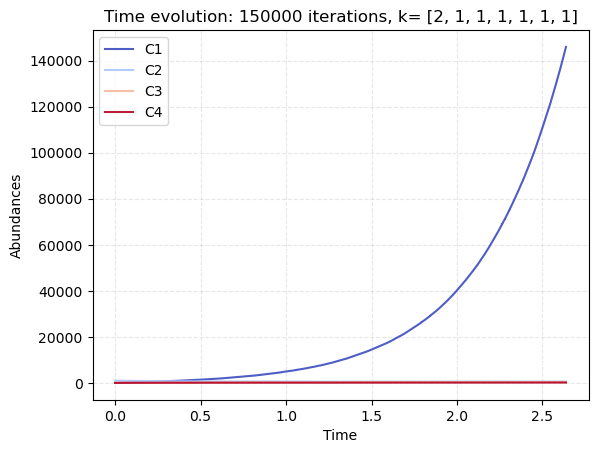

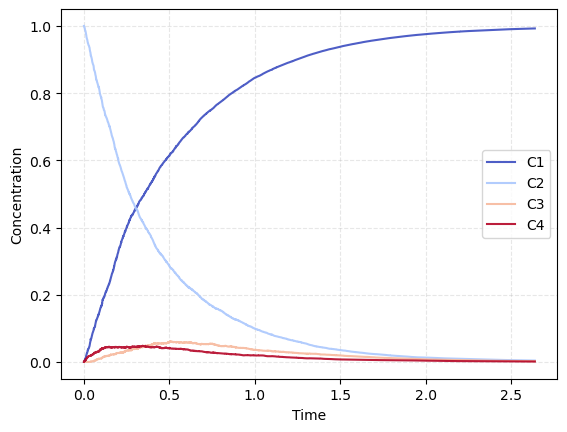

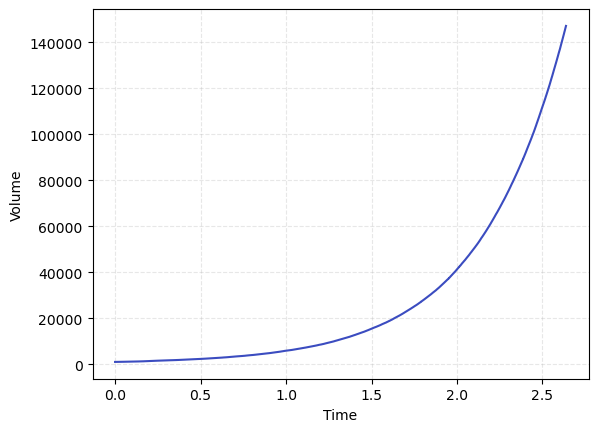

In [ ]:
# Reaction constants:
k = [2]+[1]*6# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 150000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)


## Ejemplo 5

Qué pasa si en vez de tener C2 de base se tiene C4 (se puede obtener el resto de especies a partir de C4 y C1)

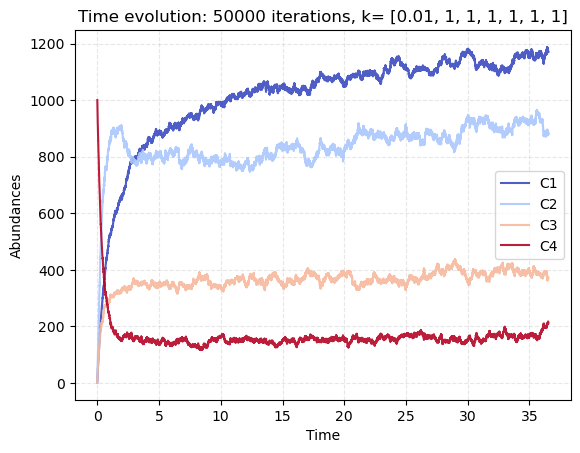

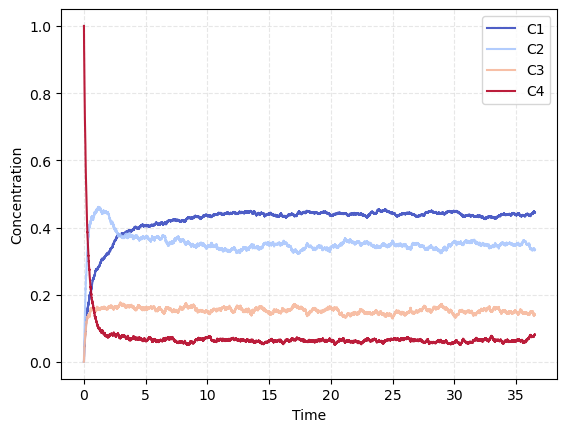

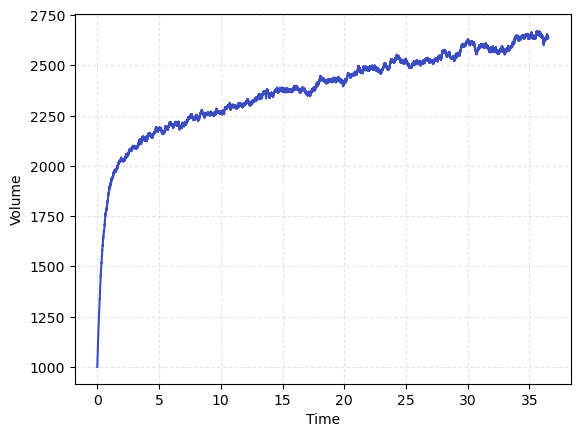

In [ ]:
# Reaction constants:
k = [1e-2]+[1]*6# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,0,0,1000] # initial molecules number

# obtener reacciones y especies:
n_iterations= 50000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

## Ejemplo 6

Para ver si al poner una k alta de 2C2 --> C4 aumenta el tiempo de caida

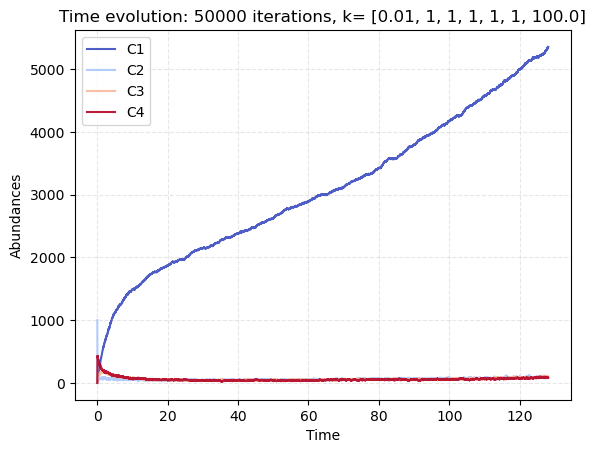

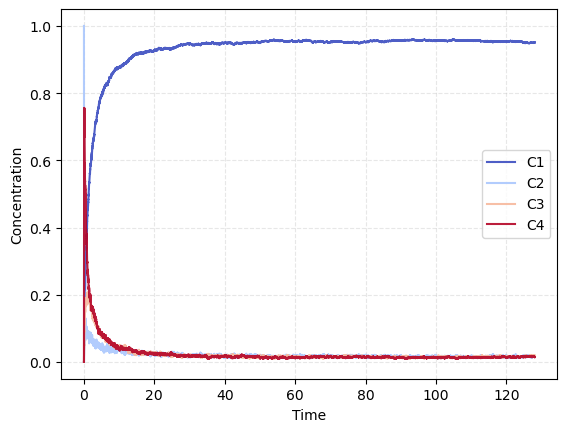

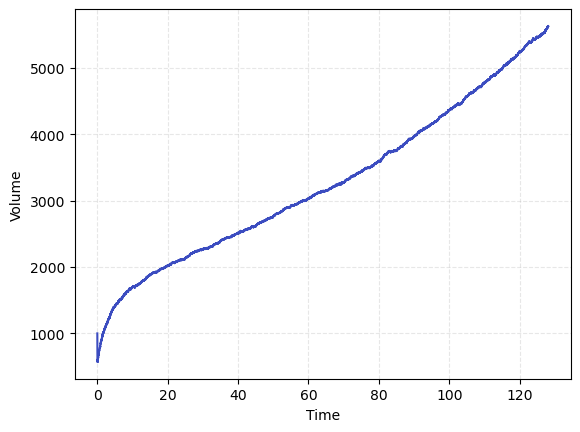

In [ ]:
# Reaction constants:
k = [1e-2]+[1]*5 +[1e2]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 50000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

### Ejemplo 6 pero con menos iteraciones para que se vea bien

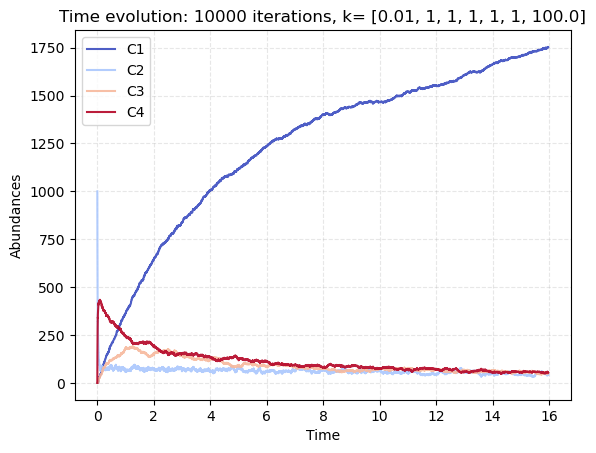

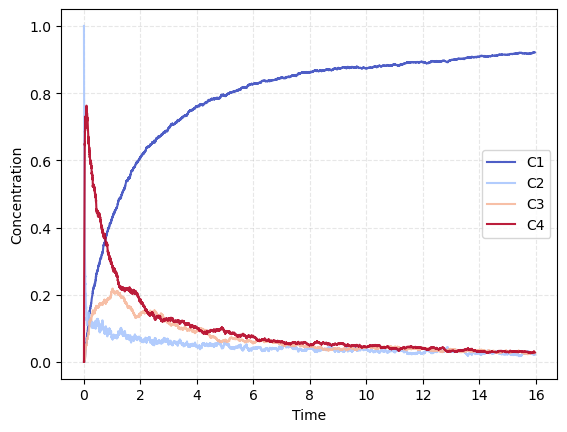

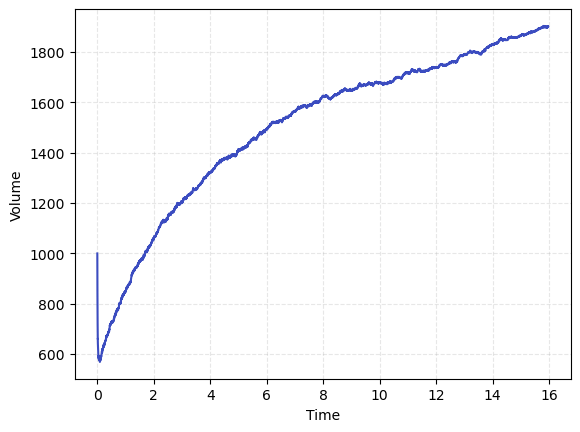

In [ ]:
# Reaction constants:
k = [1e-2]+[1]*5 +[1e2]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 10000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

## Ejemplo 7

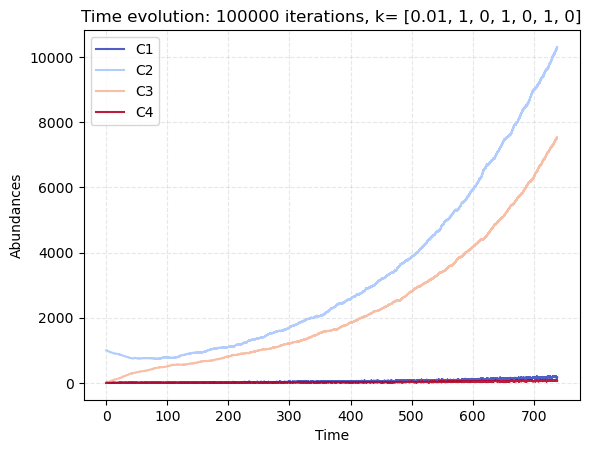

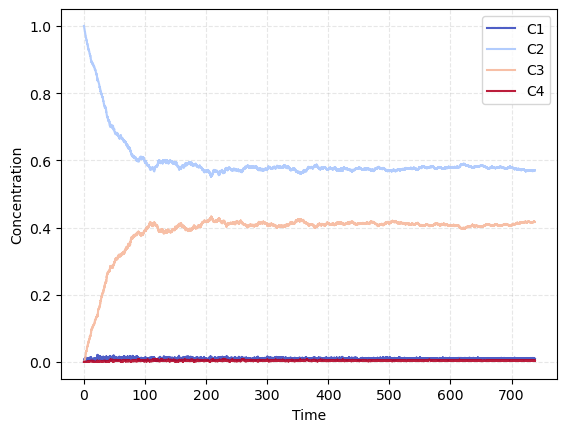

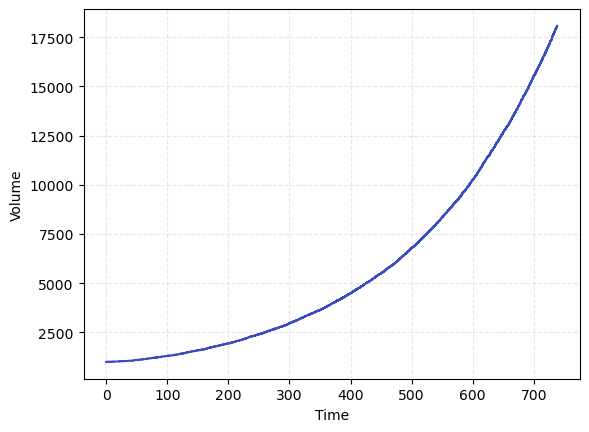

In [ ]:
# Reaction constants:
k = [1e-2]+[1,0,1,0,1,0]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 100000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

### Cambiando la especie con la que se empieza

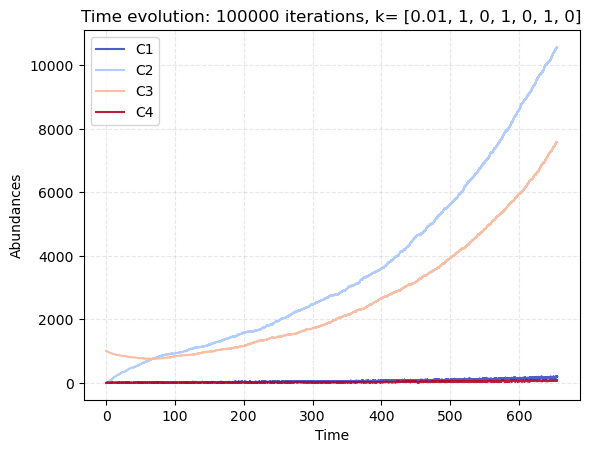

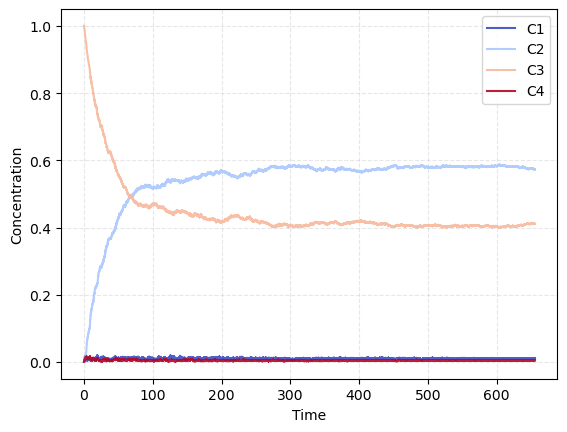

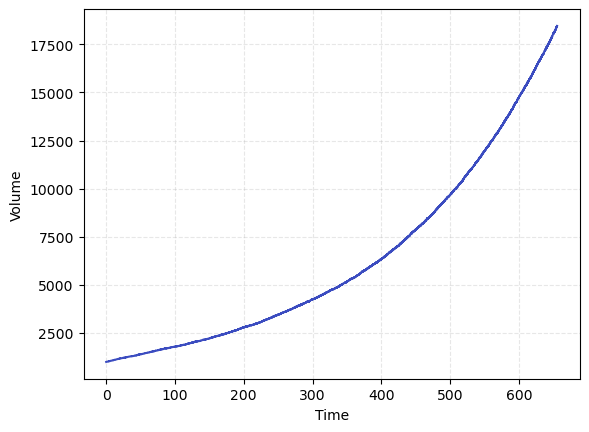

In [ ]:
# Reaction constants:
k = [1e-2]+[1,0,1,0,1,0]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,0,1000,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 100000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

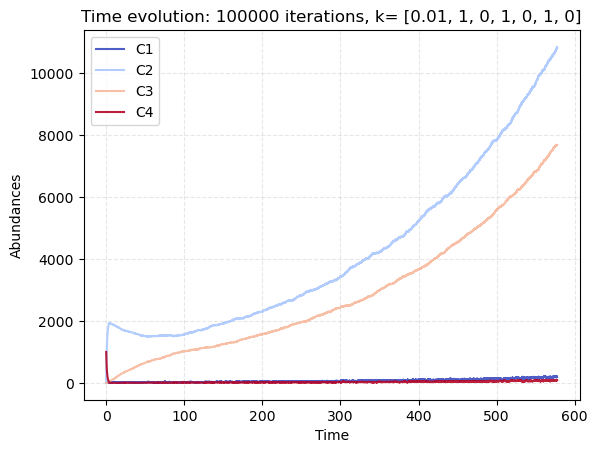

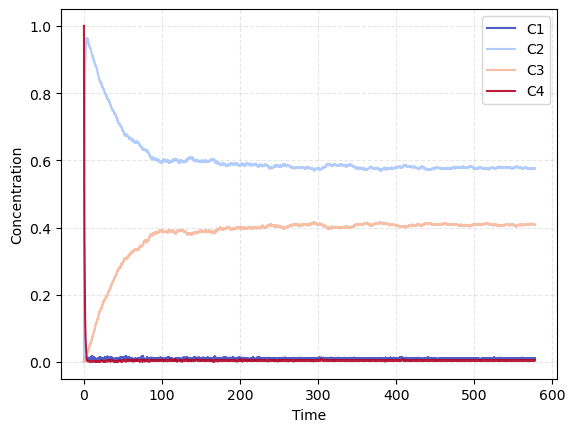

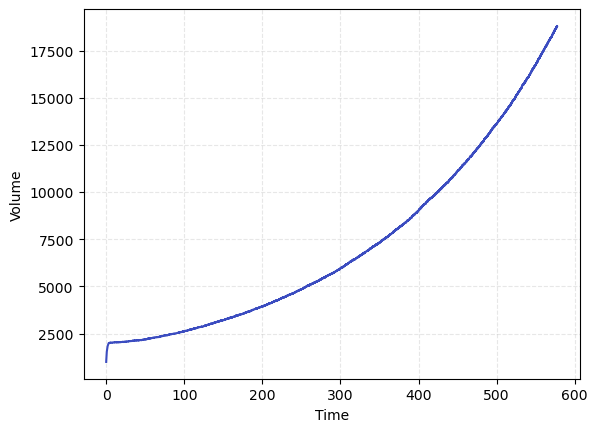

In [ ]:
# Reaction constants:
k = [1e-2]+[1,0,1,0,1,0]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,0,0,1000] # initial molecules number

# obtener reacciones y especies:
n_iterations= 100000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

## Ejemplo 7.1 con marina

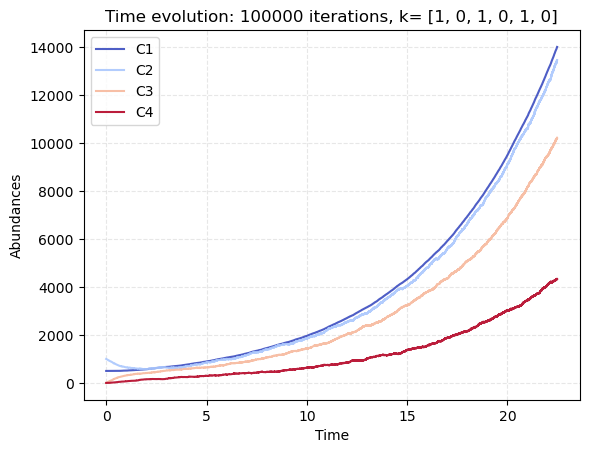

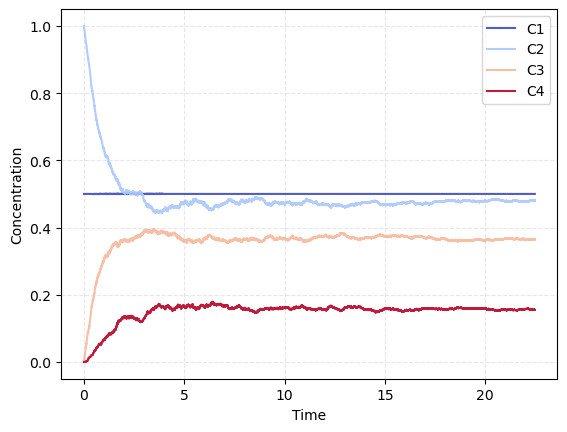

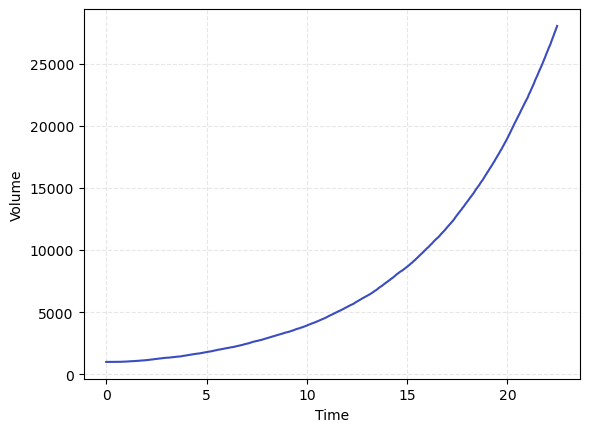

In [ ]:
# Reaction constants:
k = [1,0,1,0,1,0]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [500,1000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 100000

method = "Protocell"
abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

### Cambiando la especie con la que se empieza

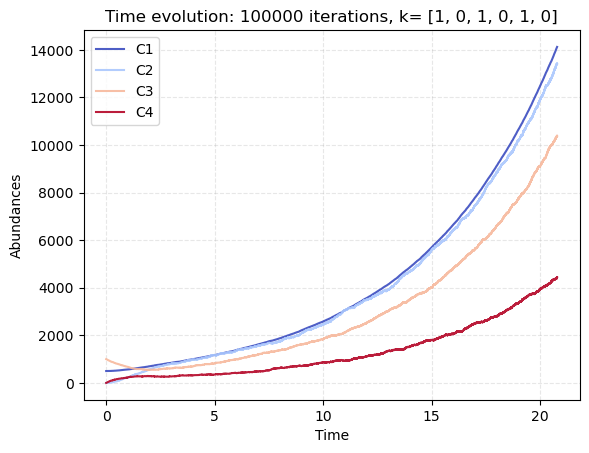

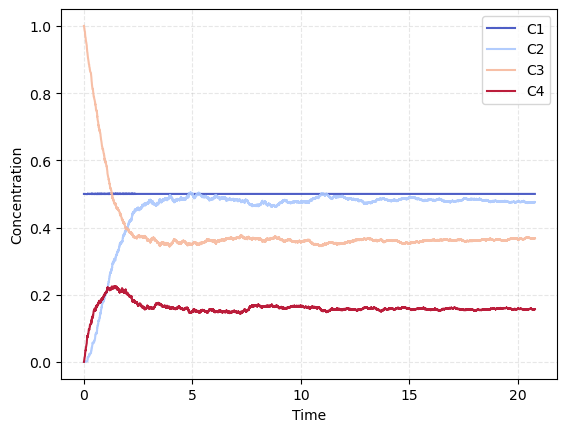

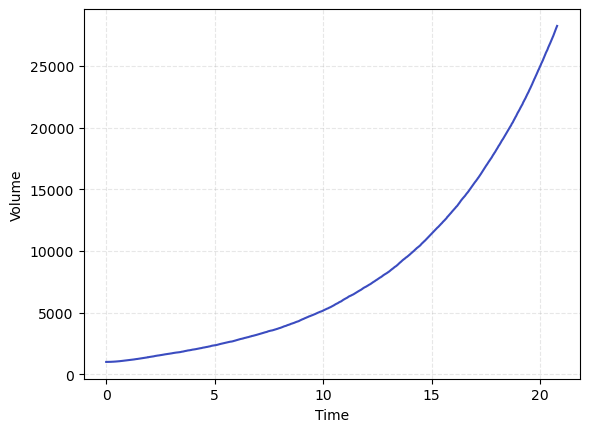

In [ ]:
# Reaction constants:
k = [1,0,1,0,1,0]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [500,0,1000,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 100000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

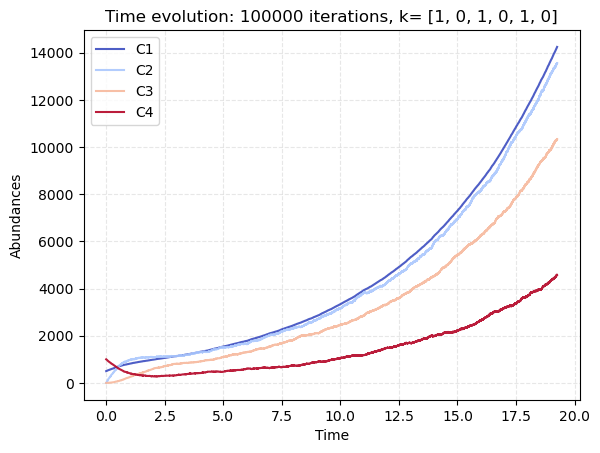

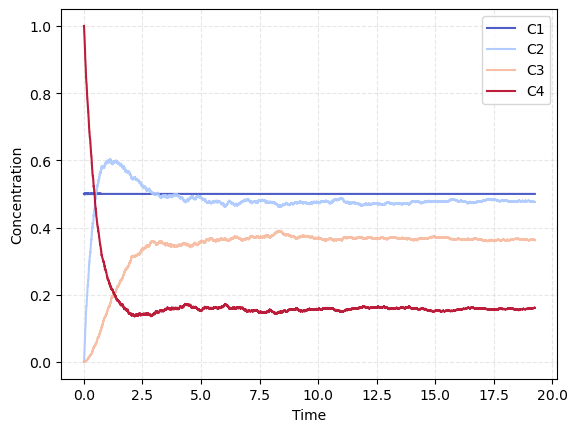

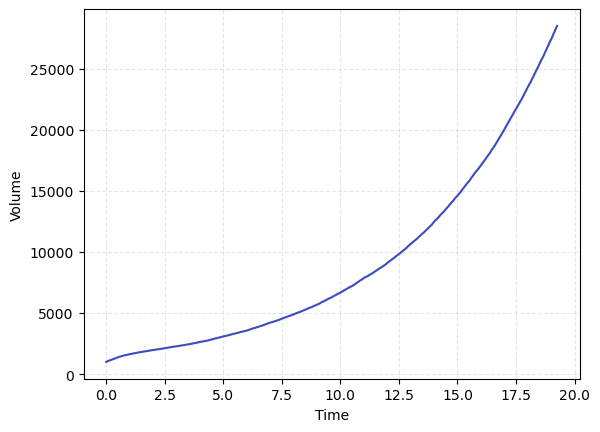

In [ ]:
# Reaction constants:
k = [1,0,1,0,1,0]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [500,0,0,1000] # initial molecules number

# obtener reacciones y especies:
n_iterations= 100000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

## Ejemplo 8

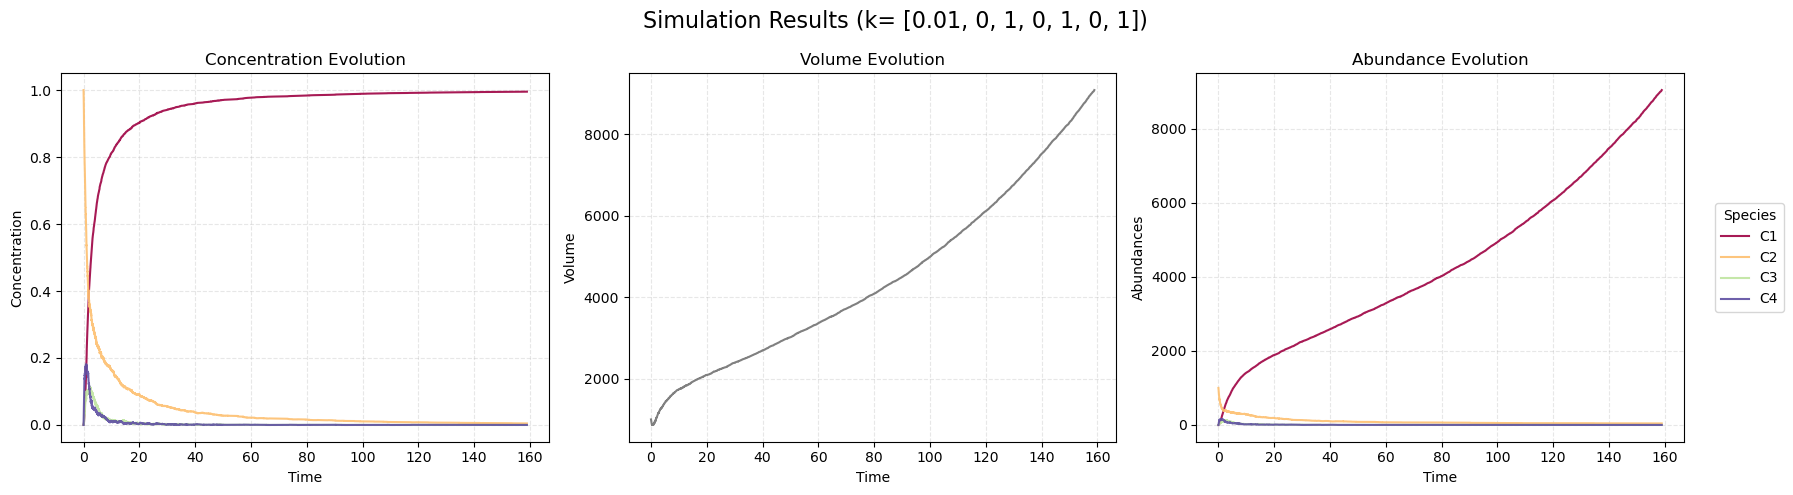

In [74]:
# Reaction constants:
k = [1e-2]+[0,1,0,1,0,1]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 10000


abundances, times, V = chemistry("Gillespie", n_iterations, reactions,
                                initial_food, k, V)
plot(abundances, times, V)

La probabilidad total es 0 !!


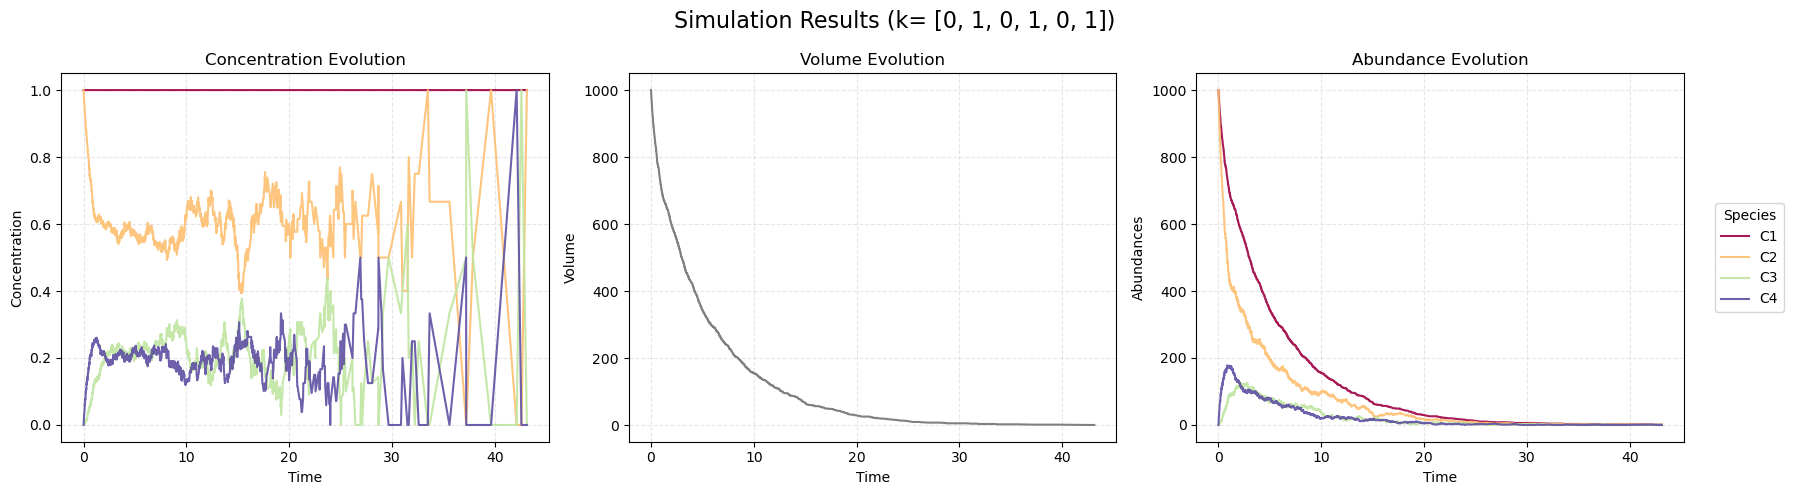

In [76]:
# Reaction constants:
k = [0,1,0,1,0,1]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [1000,1000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 10000


abundances, times, V = chemistry("Protocell", n_iterations, reactions,
                                initial_food, k, V)
plot(abundances, times, V)